In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
# Set display option to show all rows
pd.set_option('display.max_rows', None)

In [33]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('twitter_training.csv', header=None, names=['id', 'topic', 'sentiment', 'text'])

print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# First look at the data
print("\n🔍 First 5 rows:")
print(df.head())

print("\n📋 Data types:")
print(df.dtypes)

print("\n📈 Basic info:")
print(df.info())

✅ Data loaded successfully!
📊 Dataset shape: (74682, 4)
💾 Memory usage: 22.06 MB

🔍 First 5 rows:
     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

📋 Data types:
id            int64
topic        object
sentiment    object
text         object
dtype: object

📈 Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74



STEP 2: BASIC DATA EXPLORATION
----------------------------------------
Unique values per column:
  id: 12,447 unique values
  topic: 32 unique values
  sentiment: 4 unique values
  text: 69,491 unique values

Sentiment Distribution:
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Sentiment Percentages:
  Negative: 30.2%
  Positive: 27.9%
  Neutral: 24.5%
  Irrelevant: 17.4%


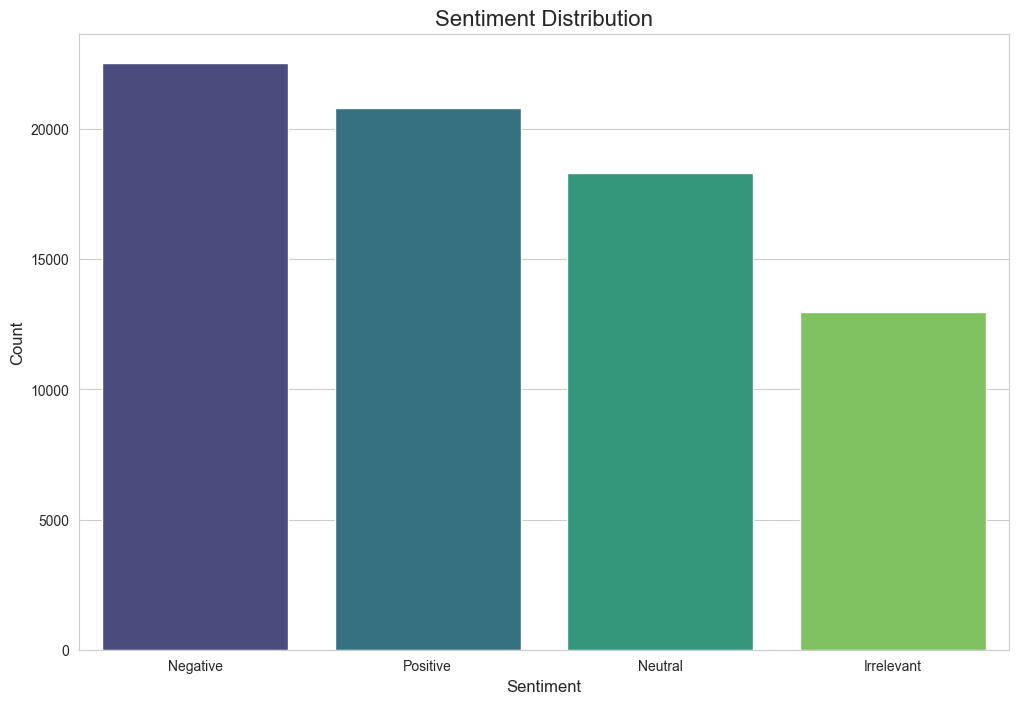

In [3]:
print("\n\nSTEP 2: BASIC DATA EXPLORATION")
print("-" * 40)

# Check unique values in each column
print("Unique values per column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count:,} unique values")

# Look at sentiment distribution
print("\nSentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', order=sentiment_counts.index)
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Calculate percentages
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Percentages:")
for sentiment, percentage in sentiment_percentages.items():
    print(f"  {sentiment}: {percentage:.1f}%")


Number of topics: ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']

🔝 Top 10 topics:
topic
TomClancysRainbowSix         2400
MaddenNFL                    2400
Microsoft                    2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64


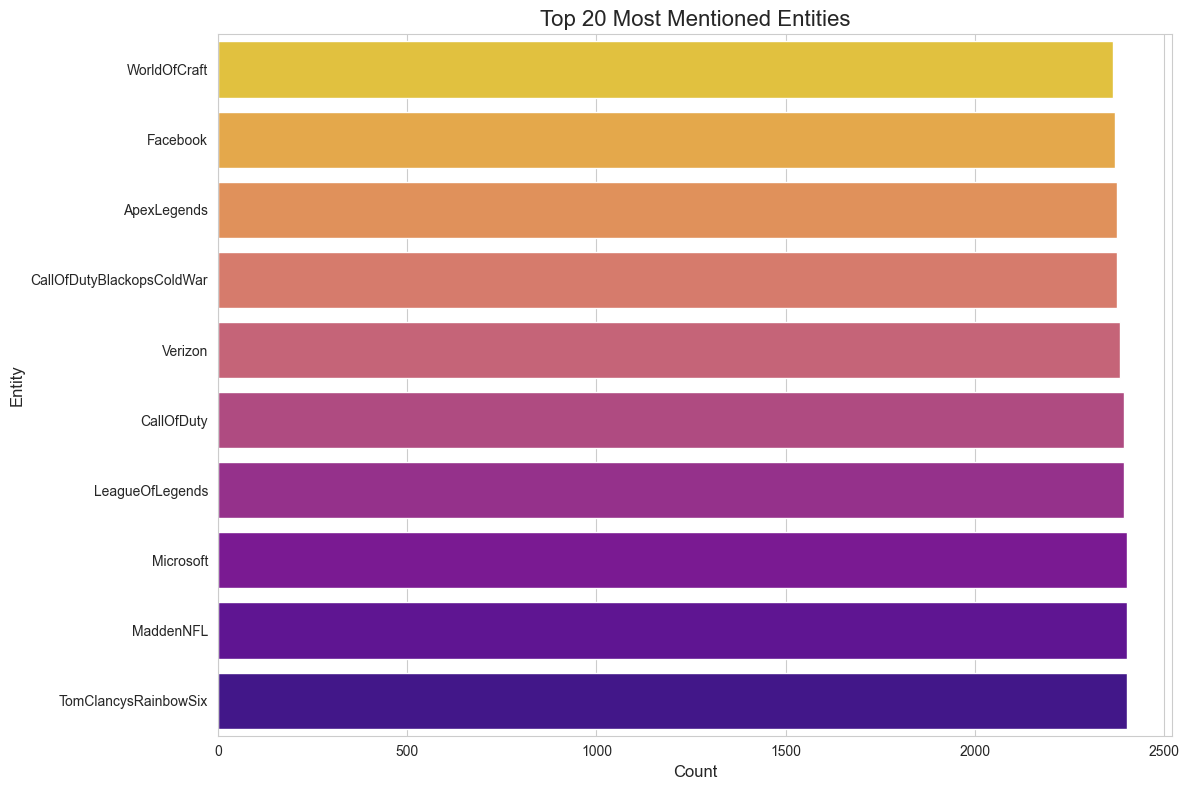

In [4]:
# ============================================================================
# TOPIC ANALYSIS
# ============================================================================
print(f"\nNumber of topics: {df['topic'].unique()}")
print("\n🔝 Top 10 topics:")
topic_counts = df['topic'].value_counts().head(10)
print(topic_counts)
sns.barplot(y=topic_counts.index, x=topic_counts.values, palette='plasma', orient='h', order=topic_counts.index)
plt.title('Top 20 Most Mentioned Entities', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Entity', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()

In [5]:
# ID analysis (this might reveal the data structure)
print(f"\nNumber of unique IDs: {df['id'].nunique():,}")
print(f"Total rows: {len(df):,}")
print(f"Average rows per ID: {len(df) / df['id'].nunique():.1f}")


Number of unique IDs: 12,447
Total rows: 74,682
Average rows per ID: 6.0


Missing values:
id             0
topic          0
sentiment      0
text         686
dtype: int64

Empty/missing text entries: 858

Text length statistics:
count    73996.000000
mean       108.783650
std         79.524212
min          1.000000
25%         47.000000
50%         91.000000
75%        153.000000
max        957.000000
Name: text_length, dtype: float64


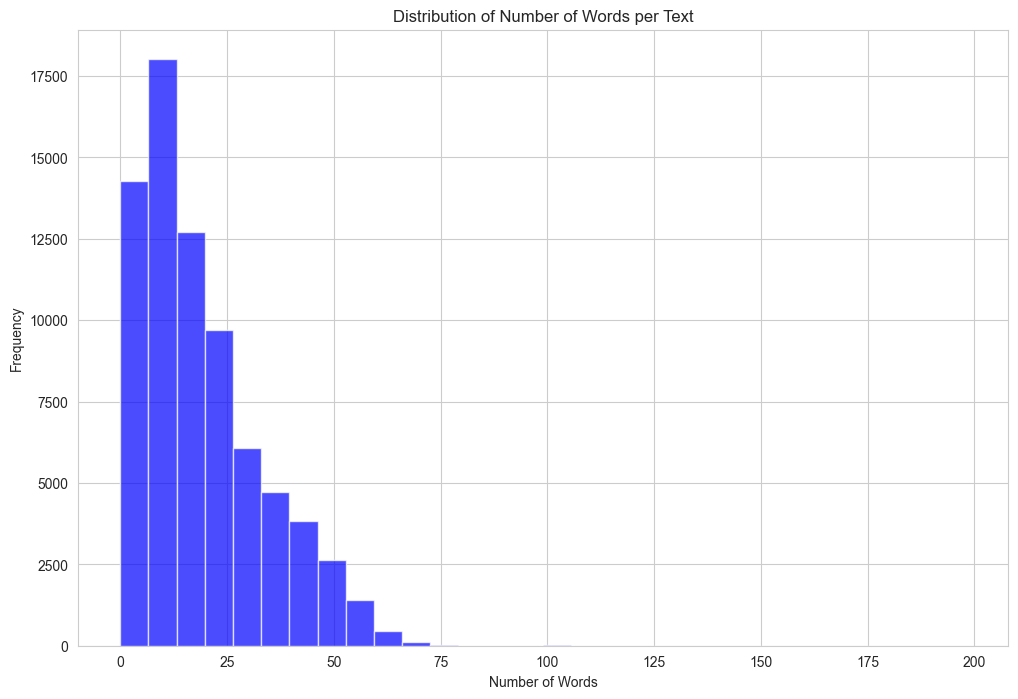


Very short texts (≤3 characters): 1410
Examples:
    text   sentiment        topic
11   was    Positive  Borderlands
53   all     Neutral  Borderlands
191  why    Positive  Borderlands
203    I    Negative  Borderlands
389   is  Irrelevant  Borderlands


In [ ]:
#Check for missing values
from matplotlib.pyplot import hist

print("Missing values:")
missing_data = df.isnull().sum()
print(missing_data)

# Check for empty strings in text column
empty_text = df['text'].isna() | (df['text'].str.strip() == '')
print(f"\nEmpty/missing text entries: {empty_text.sum()}")

# Check text lengths
df['text_length'] = df['text'].str.len()
print(f"\nText length statistics:")
print(df['text_length'].describe())

def plot_word_number_histogram(text):
    # Filter out NaN values before processing
    valid_text = text.dropna()
    word_counts = valid_text.str.split().map(lambda x: len(x) if x is not None else 0)
    word_counts.hist(bins=30, alpha=0.7, color='blue')
    plt.title('Distribution of Number of Words per Text')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()
    
plot_word_number_histogram(df['text'])

# Find extremely short texts (potential data quality issues)
very_short_texts = df[df['text_length'] <= 3]
print(f"\nVery short texts (≤3 characters): {len(very_short_texts)}")
if len(very_short_texts) > 0:
    print("Examples:")
    print(very_short_texts[['text', 'sentiment', 'topic']].head())

In [7]:
#Check word length
print("\nSample text analysis:")
all_text = ' '.join(df['text'].dropna().astype(str))

# Simple word counting
words = all_text.lower().split()
word_freq = Counter(words)
print("Top 20 most common words:")
for word, count in word_freq.most_common(20):
    print(f"  '{word}': {count:,}")


Sample text analysis:
Top 20 most common words:
  'the': 44,099
  'i': 28,916
  'to': 28,652
  'and': 26,322
  'a': 23,925
  'of': 19,307
  'is': 17,453
  'for': 15,410
  'in': 15,046
  '/': 14,655
  'this': 13,708
  'my': 11,767
  'on': 11,592
  'it': 11,413
  'you': 11,273
  '@': 11,081
  '.': 10,201
  'that': 9,705
  'with': 8,714
  'so': 7,593


From the most 20 common words appeared, notice that these are mostly English stopwords. We should eliminate them to get better insights on our dataset

In [8]:
# Run this cell first to ensure NLTK data is downloaded
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Force download with verbose output
nltk.download('stopwords')
print("✅ NLTK stopwords downloaded successfully!")

✅ NLTK stopwords downloaded successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khoivo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Get English stopwords
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))


STOPWORDS ANALYSIS
------------------------------
Top 20 most frequent stopwords in the dataset:
  'the': 44,099
  'i': 28,916
  'to': 28,652
  'and': 26,322
  'a': 23,925
  'of': 19,307
  'is': 17,453
  'for': 15,410
  'in': 15,046
  'this': 13,708
  'my': 11,767
  'on': 11,592
  'it': 11,413
  'you': 11,273
  'that': 9,705
  'with': 8,714
  'so': 7,593
  'have': 6,628
  'just': 6,588
  'but': 6,216


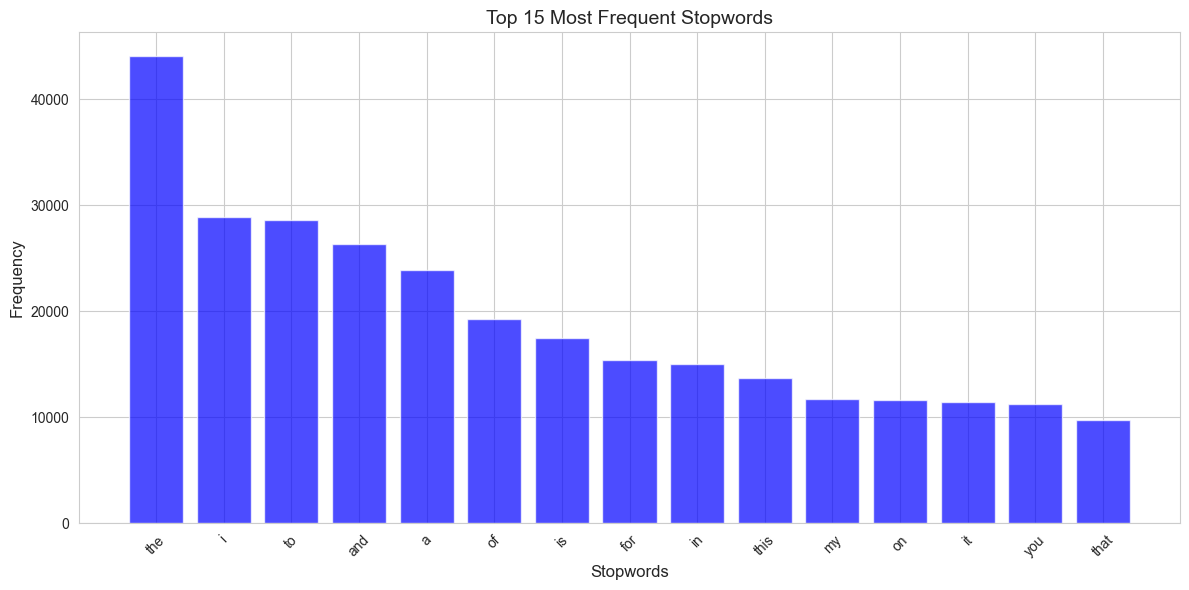

In [11]:
# Check for stopwords in text data and visualize
print("\nSTOPWORDS ANALYSIS")
print("-" * 30)

import matplotlib.pyplot as plt
import string

# Get all text and split into words
all_text = ' '.join(df['text'].dropna().astype(str))
words = all_text.lower().split()

# Filter only stopwords and count them
stopwords_in_text = [word for word in words if word in english_stopwords]
stopword_freq = Counter(stopwords_in_text)

print("Top 20 most frequent stopwords in the dataset:")
for word, count in stopword_freq.most_common(20):
    print(f"  '{word}': {count:,}")

# Simple bar plot of top 15 stopwords
top_stopwords = stopword_freq.most_common(15)
words_list, counts_list = zip(*top_stopwords)

plt.figure(figsize=(12, 6))
plt.bar(words_list, counts_list, color='blue', alpha=0.7)
plt.title('Top 15 Most Frequent Stopwords', fontsize=14)
plt.xlabel('Stopwords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import re
def clean_text(text):
    # 1. Lowercase 
    text = text.lower()

    # 2. URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. @mention
    text = re.sub(r'@\w+', '', text)

    # 4. hashtag
    def process_hashtag(match):
        hashtag = match.group(1)
        # CamelCase (#BeautifulDay -> 'Beautiful Day')
        words = re.sub(r'([a-z])([A-Z])', r'\1 \2', hashtag)
        return words.lower()

    text = re.sub(r'#(\w+)', process_hashtag, text)

    # 5. Delete special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # 6. Delete whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [14]:
%pip install emoji
import emoji

def sentiment_aware_tokenize(text):
    # Giữ emoji thành token riêng
    text = emoji.demojize(text, delimiters=(" ", " "))
    tokens = text.split()
    return tokens

Note: you may need to restart the kernel to use updated packages.


In [15]:

df['CleanedText'] = (
    df['text']
    .fillna('')
    .apply(clean_text)
    .apply(sentiment_aware_tokenize)
    .apply(lambda tokens: ' '.join(tokens))  # list -> string
)

In [16]:
def plot_top_non_stopwords_barchart(text):
    # Filter out NaN values first
    valid_text = text.dropna()
    
    # Split and create corpus
    new = valid_text.str.split()
    new = new.values.tolist()
    corpus=[word for i in new for word in i if word is not None]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:80]:
        if (word not in english_stopwords):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

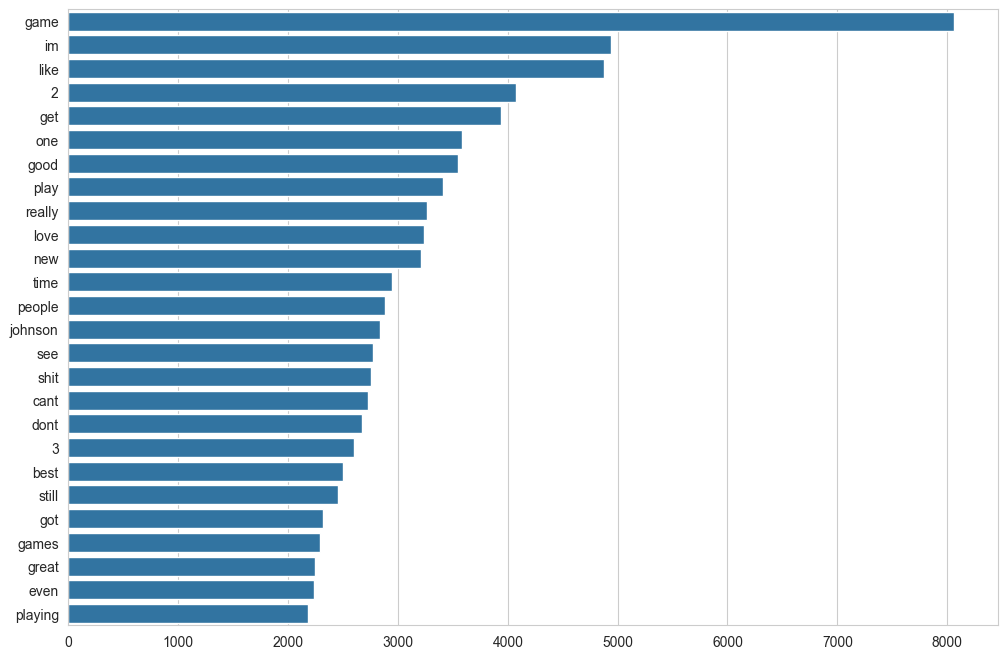

In [17]:
plot_top_non_stopwords_barchart(df['CleanedText'])

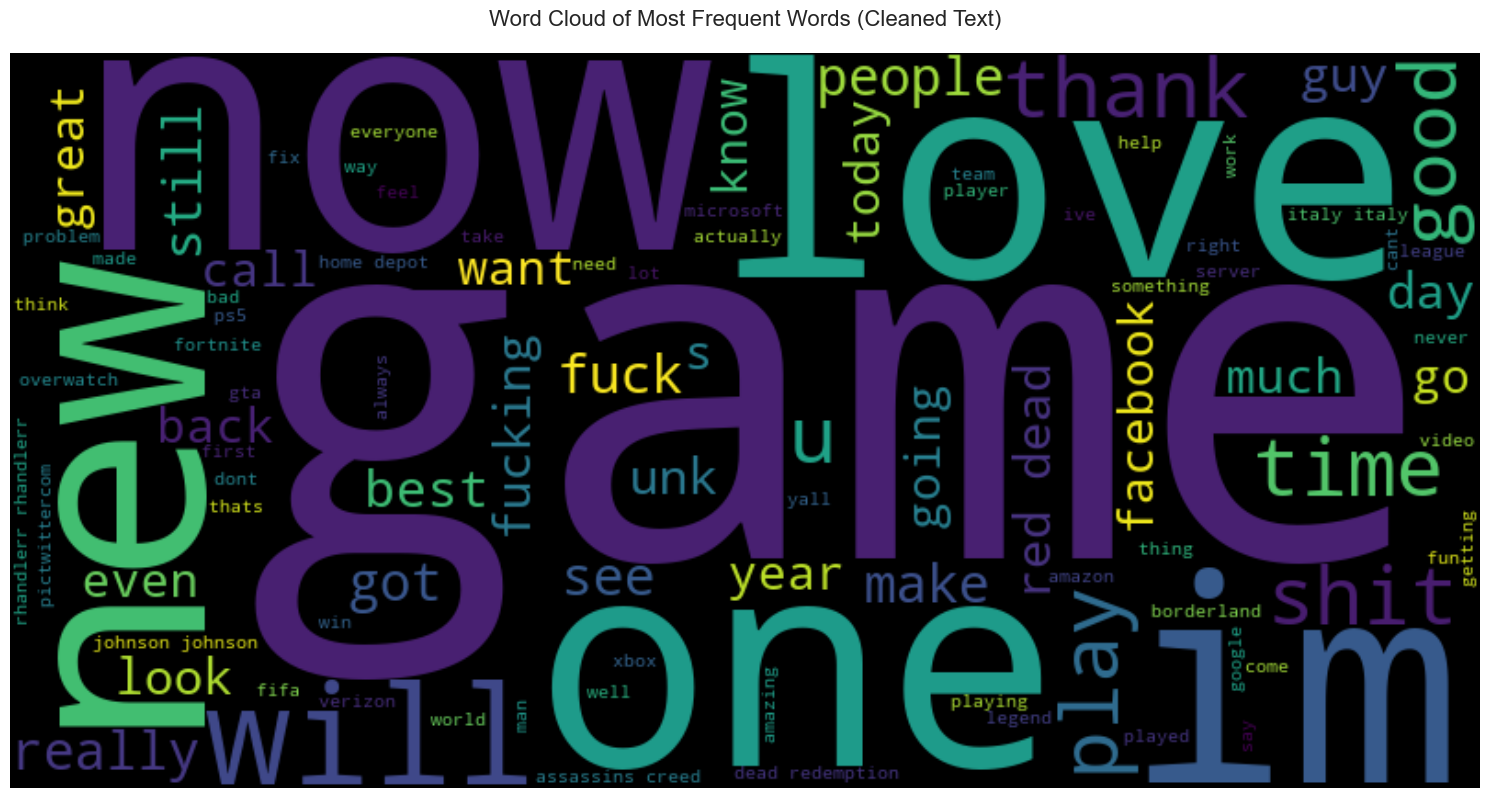

In [18]:
#Word frequency using WordCloud for all text
from wordcloud import WordCloud

# Combine all cleaned text
all_cleaned_text = ' '.join(df['CleanedText'].dropna().astype(str))

# Create WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black',
    max_words=100,
    colormap='viridis',
    relative_scaling=0.5,
    random_state=42
).generate(all_cleaned_text)

# Plot the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words (Cleaned Text)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

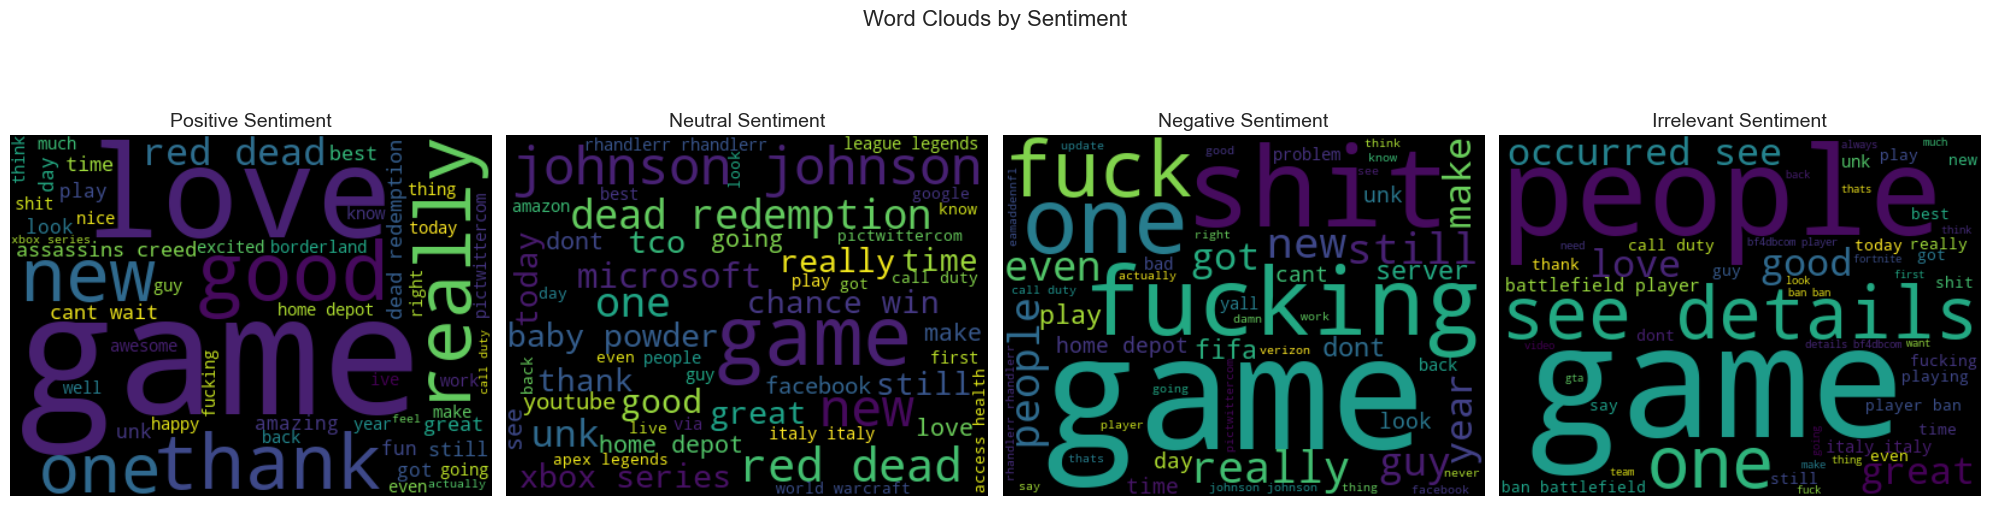

In [20]:
# WordClouds by sentiment
sentiments = df['sentiment'].unique()
fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 6))

for i, sentiment in enumerate(sentiments):
    # Get text for this sentiment
    sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['CleanedText'].dropna().astype(str))
    
    # Filter words
    words = sentiment_text.split()
    filtered_words = [word for word in words if word not in english_stopwords and len(word) > 2]
    final_text = ' '.join(filtered_words)
    
    # Create WordCloud
    if final_text:  # Only if there's text
        wordcloud = WordCloud(
            width=400, 
            height=300, 
            background_color='black',
            max_words=50,
            colormap='viridis',
            random_state=42
        ).generate(final_text)
        
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'{sentiment} Sentiment', fontsize=14)

plt.suptitle('Word Clouds by Sentiment', fontsize=16)
plt.tight_layout()
plt.show()

# 🔍 Key Insights from Word Cloud Analysis

## 1. Gaming Domain Dominance
**What you see:** "borderlands", "red dead", "assassins creed", "league legends", "apex legends" across all sentiments

**Insight:** This is heavily gaming-focused data, not general social media sentiment

**Implication:** You need gaming-specific sentiment understanding

---

## 2. Profanity ≠ Negative Sentiment (Gaming Context)
**What you see:** "fuck", "shit", "fucking" prominent in negative sentiment

**Critical insight:** In gaming, profanity often expresses excitement, not negativity 
- *Example: "This game is fucking amazing!"*

**Problem:** Standard sentiment models will misclassify gaming enthusiasm as negative

---

## 3. Brand Names Dominate Neutral
**What you see:** "microsoft", "johnson", company/game names in neutral

**Insight:** Neutral class contains factual mentions and brand discussions

**Implication:** Neutral might be "informational" rather than "emotionally neutral"

---

## 4. "Irrelevant" Class Is Unclear
**What you see:** Mix of "occurred", "people", "good", "call duty"

**Problem:** This class seems inconsistently defined

**Risk:** Model will struggle with unclear class boundaries

---

# Critical Problems Revealed

## Problem 1: Context-Dependent Sentiment
Gaming language has **inverted sentiment meanings**:

| Gaming Expression | Actual Meaning | Standard Model Prediction |
|------------------|----------------|--------------------------|
| "I'll destroy everyone" | Positive (excitement) | ❌ Negative |
| "This game is sick" | Positive (awesome) | ❌ Negative |
| "Dead" in "Red Dead Redemption" | Neutral (game title) | ❌ Negative |

## Problem 2: Class Overlap
- **Issue:** "game" appears across all sentiments
- **Implication:** Categories overlap significantly

## Problem 3: Domain-Specific Vocabulary
- **Issue:** Standard pre-trained sentiment models will fail on gaming terminology
- **Solution needed:** Domain-specific model training or fine-tuning

---

# 💡 Recommendations

1. **Consider domain adaptation** for sentiment models
2. **Create gaming-specific sentiment lexicon**
3. **Review and refine label definitions**, especially "Irrelevant"
4. **Handle context-dependent expressions** in preprocessing
5. **Validate model performance** on gaming-specific test cases

In [27]:
#Check N-Grams
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

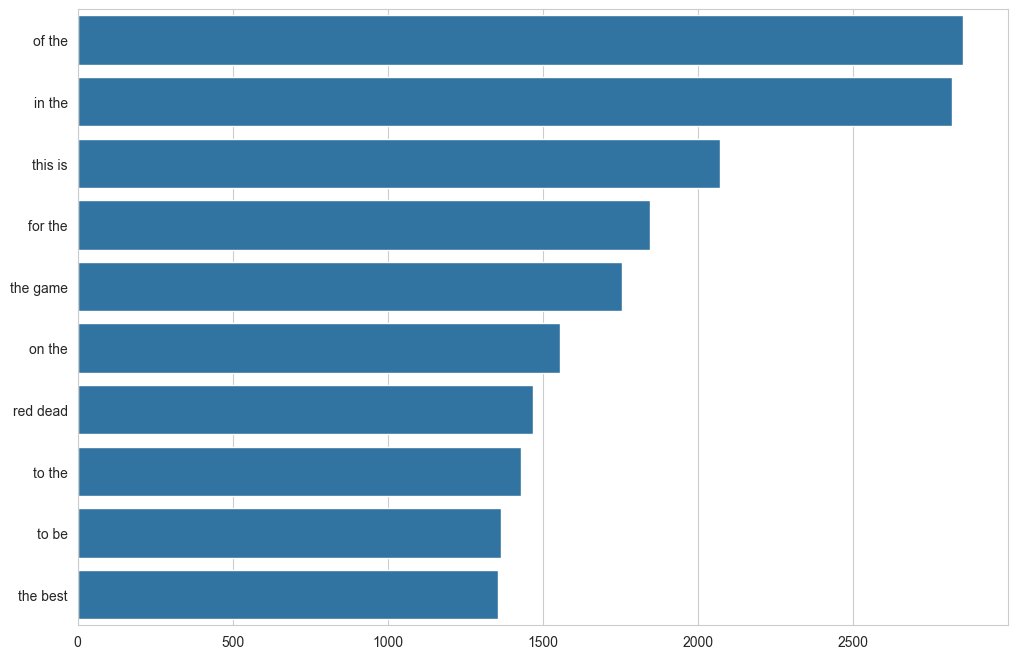

In [ ]:
# Check for Bi-grams frequency
plot_top_ngrams_barchart(df['CleanedText'],2)

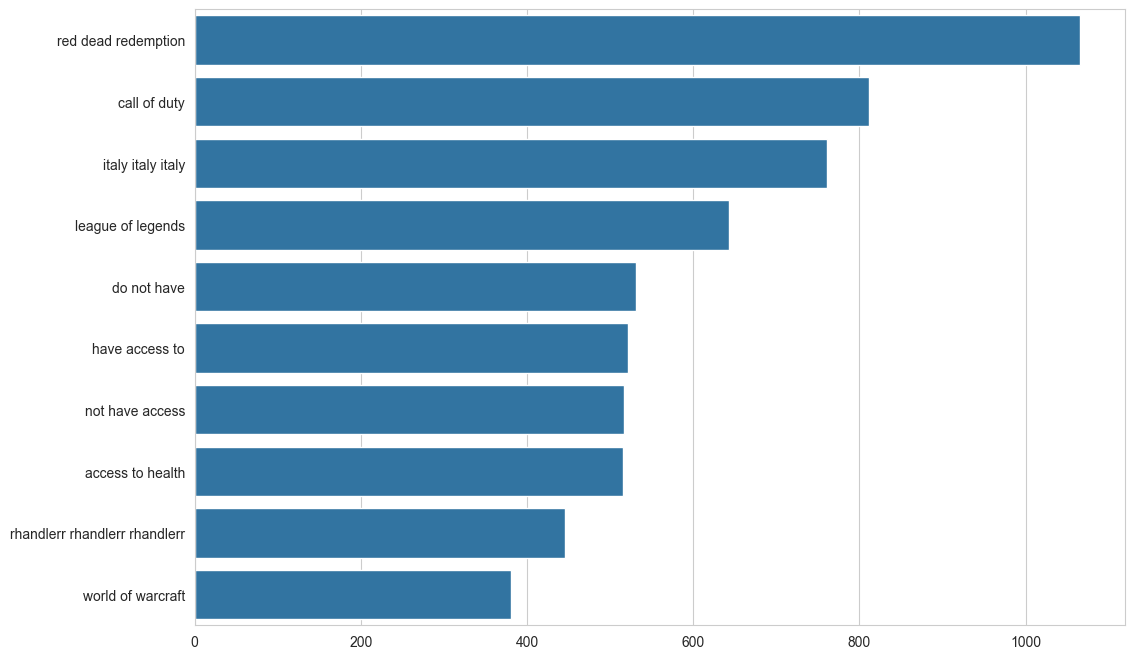

In [29]:
# Check for Tri-grams frequency
plot_top_ngrams_barchart(df['CleanedText'],3)

# 🚨 Major Red Flags in Your Trigrams

## 1. 🔄 Suspicious Repetitive Patterns

- **"italy italy italy"** (700+ occurrences)
- **"rhandlerr rhandlerr rhandlerr"** (400+ occurrences)

### What this means:
Your dataset contains **artificial/corrupted text**, possibly from:
- ❌ Data augmentation gone wrong
- ❌ Text generation errors  
- ❌ Copy-paste mistakes during data collection

---

## 2. 🏥 Template-Like Healthcare Language

**Pattern Chain:**
```
"do not have" → "not have access" → "have access to" → "access to health"
```

### 🔍 This is a smoking gun! 
These form a chain suggesting **automated text generation** or template filling:
- `"[People] do not have access to health[care]"`
- `"[Users] not have access to [service]"`
- `"[Customers] have access to [product]"`

---

## 3. 🎮 Gaming Titles Dominating

| Game Title | Frequency |
|------------|-----------|
| "red dead redemption" | 1000+ occurrences |
| "call of duty" | 800+ occurrences |
| "league of legends" | 600+ occurrences |
| "world of warcraft" | 300+ occurrences |

---

# 🔍 Critical Insights

## ⚠️ Insight 1: Data Contamination
Your dataset is **heavily contaminated** with:
- 🤖 Synthetic/generated text
- 📝 Template-based content
- 🔁 Repeated phrases that aren't natural language

## 📱 Insight 2: Not Real Social Media Data
This pattern suggests your data is:
- 🏭 Artificially generated for different topics
- 📋 Template-filled rather than organic user content
- 🔧 Augmented through text manipulation techniques

## 🎯 Insight 3: Gaming vs Non-Gaming Split
The healthcare language mixed with gaming suggests this dataset **combines multiple domains artificially**.

---

# 💡 Action Items

1. **🔍 Investigate data source** - Where did this dataset come from?
2. **🧹 Clean repetitive patterns** - Remove obvious artificial text
3. **📊 Consider domain separation** - Split gaming vs healthcare data
4. **✅ Validate authenticity** - Check if this represents real user sentiment
5. **⚠️ Proceed with caution** - Results may not generalize to real social media

---

> **⚠️ Warning:** This dataset appears to be synthetic or heavily augmented. Model performance on real-world data may differ significantly.

In [15]:
# Check for label inconsistencies
print("\n⚠️ Label Consistency Check:")
text_sentiment_groups = df.groupby('text')['sentiment'].nunique()
inconsistent_texts = text_sentiment_groups[text_sentiment_groups > 1]
print(f"  Texts with multiple sentiment labels: {len(inconsistent_texts)}")

if len(inconsistent_texts) > 0:
    print("  Examples of inconsistent labeling:")
    for text in inconsistent_texts.head(3).index:
        sentiments = df[df['text'] == text]['sentiment'].unique()
        print(f"    \"{text[:50]}...\" → {list(sentiments)}")


⚠️ Label Consistency Check:
  Texts with multiple sentiment labels: 137
  Examples of inconsistent labeling:
    " ..." → ['Irrelevant', 'Positive', 'Neutral', 'Negative']
    " .  ..." → ['Positive', 'Negative']
    " . .  ..." → ['Negative', 'Neutral', 'Positive', 'Irrelevant']


In [17]:
# ============================================================================
# STEP 6: SENTIMENT-TOPIC RELATIONSHIPS
# ============================================================================

print("\n\n🎯 STEP 6: SENTIMENT-TOPIC RELATIONSHIPS")
print("-" * 42)

# Create cross-tabulation
sentiment_topic_crosstab = pd.crosstab(df['topic'], df['sentiment'])
print("📊 Sentiment distribution by topic (top 5 topics):")
top_topics = df['topic'].value_counts().head(5).index
print(sentiment_topic_crosstab.loc[top_topics])

# Find topics with extreme sentiment distributions
topic_sentiment_props = pd.crosstab(df['topic'], df['sentiment'], normalize='index')
print("\n🎯 Topics with extreme sentiment patterns:")

# Most positive topics
most_positive = topic_sentiment_props.sort_values('Positive', ascending=False).head(3)
print("  Most positive topics:")
for topic in most_positive.index:
    pos_pct = most_positive.loc[topic, 'Positive'] * 100
    print(f"    {topic}: {pos_pct:.1f}% positive")

# Most negative topics  
most_negative = topic_sentiment_props.sort_values('Negative', ascending=False).head(3)
print("  Most negative topics:")
for topic in most_negative.index:
    neg_pct = most_negative.loc[topic, 'Negative'] * 100
    print(f"    {topic}: {neg_pct:.1f}% negative")



🎯 STEP 6: SENTIMENT-TOPIC RELATIONSHIPS
------------------------------------------
📊 Sentiment distribution by topic (top 5 topics):
sentiment             Irrelevant  Negative  Neutral  Positive
topic                                                        
TomClancysRainbowSix          96      1122      654       528
MaddenNFL                     90      1710      204       396
Microsoft                    174       774      846       606
LeagueOfLegends              312       642      822       618
CallOfDuty                   672       894      378       450

🎯 Topics with extreme sentiment patterns:
  Most positive topics:
    AssassinsCreed: 64.4% positive
    Borderlands: 44.6% positive
    Cyberpunk2077: 41.9% positive
  Most negative topics:
    MaddenNFL: 71.2% negative
    NBA2K: 62.8% negative
    FIFA: 50.3% negative


In [30]:
%pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 5.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [textstat]6/7 [textstat]s]
Note: you may need to restart the kernel to use updated packages.


In [66]:
import textstat
def calculate_flesch_score(text):
    """Calculate Flesch Reading Ease score for a given text"""
    if pd.isna(text) or text.strip() == '':
        return np.nan
    
    try:
        score = textstat.flesch_reading_ease(text)
        return score
    except:
        return np.nan

# Calculate Flesch scores for cleaned text
df['flesch_scores'] = df['CleanedText'].apply(calculate_flesch_score)

Filtering data for focused analysis...
📊 Data breakdown:
  Reasonable scores (-50 to 120): 70,383 texts
  Extreme scores (outside range): 3,274 texts
  Total valid scores: 73,657 texts
  Percentage of reasonable data: 95.6%

📈 Reasonable data statistics:
  Mean: 63.1
  Median: 63.6
  Min: -49.0
  Max: 119.2
  Std: 26.5


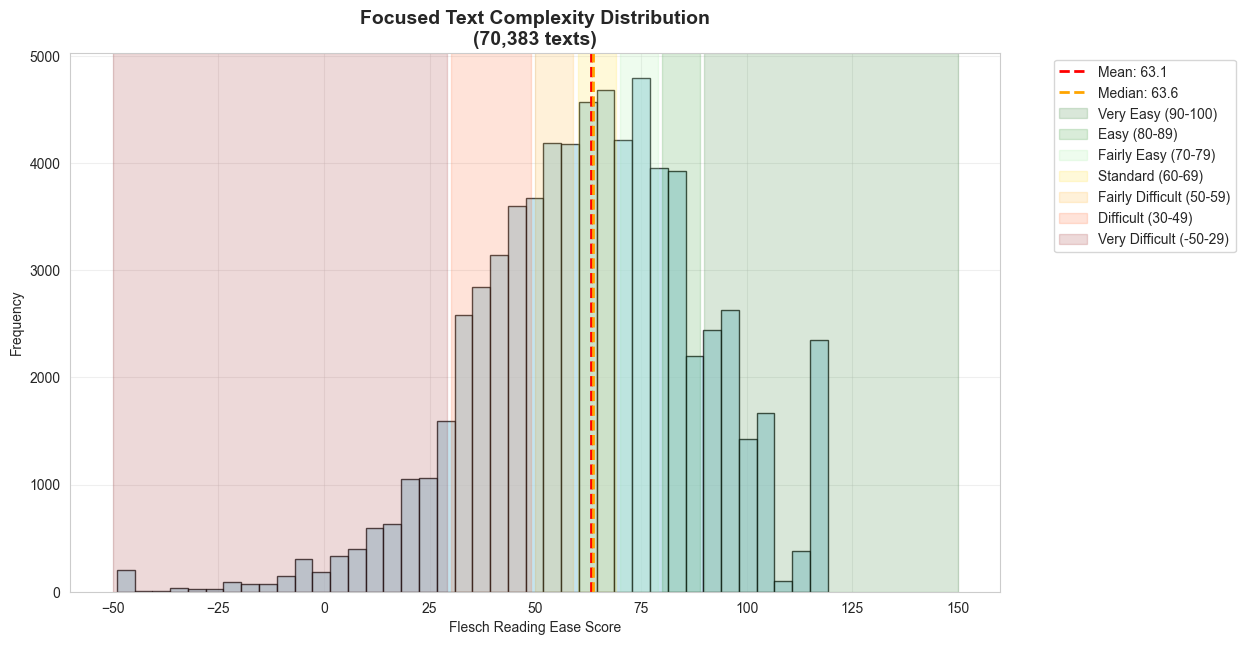

In [70]:
# Filter out extreme/invalid scores to focus on meaningful data
print("Filtering data for focused analysis...")

# Keep only reasonable Flesch scores (typically 0-100, maybe allow some negatives to -50)
reasonable_scores = df['flesch_scores'][(df['flesch_scores'] >= -50) & (df['flesch_scores'] <= 120)]
extreme_scores = df['flesch_scores'][(df['flesch_scores'] < -50) | (df['flesch_scores'] > 120)]

print(f"📊 Data breakdown:")
print(f"  Reasonable scores (-50 to 120): {len(reasonable_scores):,} texts")
print(f"  Extreme scores (outside range): {len(extreme_scores):,} texts")
print(f"  Total valid scores: {len(df['flesch_scores'].dropna()):,} texts")
print(f"  Percentage of reasonable data: {(len(reasonable_scores)/len(df['flesch_scores'].dropna()))*100:.1f}%")

if len(reasonable_scores) > 0:
    print(f"\n📈 Reasonable data statistics:")
    print(f"  Mean: {reasonable_scores.mean():.1f}")
    print(f"  Median: {reasonable_scores.median():.1f}")
    print(f"  Min: {reasonable_scores.min():.1f}")
    print(f"  Max: {reasonable_scores.max():.1f}")
    print(f"  Std: {reasonable_scores.std():.1f}")

# Create focused histogram
fig, ax1 = plt.subplots(1, 1, figsize=(12, 7))

# Left plot: Focused on reasonable scores
if len(reasonable_scores) > 0:
    ax1.hist(reasonable_scores, bins=40, alpha=0.7, color='lightblue', edgecolor='black')
    
    # Add reference lines
    ax1.axvline(reasonable_scores.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {reasonable_scores.mean():.1f}')
    ax1.axvline(reasonable_scores.median(), color='orange', linestyle='--', linewidth=2, 
                label=f'Median: {reasonable_scores.median():.1f}')
    
    # Add reading level zones with clearer colors
    ax1.axvspan(90, 150, alpha=0.15, color='darkgreen', label='Very Easy (90-100)')
    ax1.axvspan(80, 89, alpha=0.15, color='green', label='Easy (80-89)')
    ax1.axvspan(70, 79, alpha=0.15, color='lightgreen', label='Fairly Easy (70-79)')
    ax1.axvspan(60, 69, alpha=0.15, color='gold', label='Standard (60-69)')
    ax1.axvspan(50, 59, alpha=0.15, color='orange', label='Fairly Difficult (50-59)')
    ax1.axvspan(30, 49, alpha=0.15, color='orangered', label='Difficult (30-49)')
    ax1.axvspan(-50, 29, alpha=0.15, color='darkred', label='Very Difficult (-50-29)')

    
    ax1.set_title(f'Focused Text Complexity Distribution\n({len(reasonable_scores):,} texts)', 
                fontsize=14, fontweight='bold')
    ax1.set_xlabel('Flesch Reading Ease Score')
    ax1.set_ylabel('Frequency')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
plt.show()

📊 Text Complexity Analysis by Sentiment

Positive Sentiment:
  📊 Sample size: 19,361 texts
  📈 Mean complexity: 66.8
  📍 Median complexity: 67.3
  📏 Std deviation: 26.7
  🎯 Average reading level: Standard

Neutral Sentiment:
  📊 Sample size: 17,329 texts
  📈 Mean complexity: 56.2
  📍 Median complexity: 57.0
  📏 Std deviation: 27.0
  🎯 Average reading level: Standard

Negative Sentiment:
  📊 Sample size: 21,303 texts
  📈 Mean complexity: 65.0
  📍 Median complexity: 66.1
  📏 Std deviation: 25.5
  🎯 Average reading level: Standard

Irrelevant Sentiment:
  📊 Sample size: 12,390 texts
  📈 Mean complexity: 63.7
  📍 Median complexity: 64.6
  📏 Std deviation: 25.5
  🎯 Average reading level: Standard


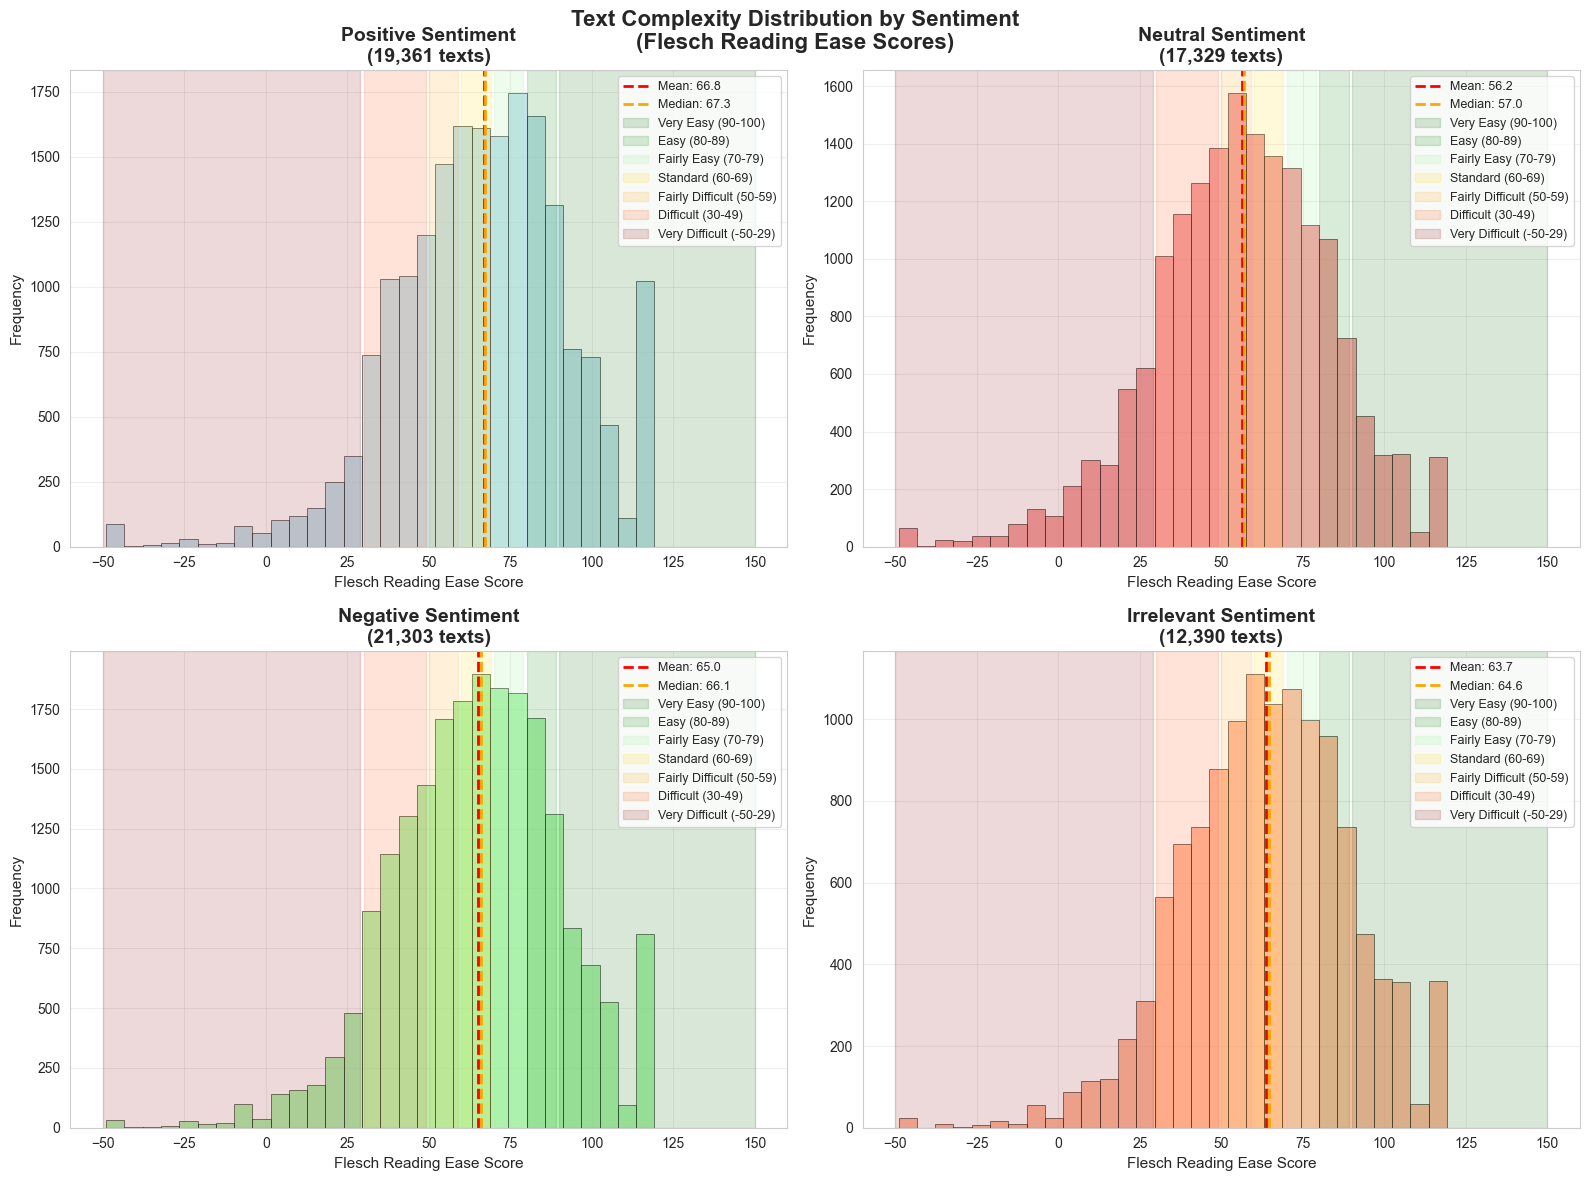


🎯 COMPLEXITY COMPARISON SUMMARY

📊 Ranking by text complexity (higher score = easier to read):
  1. Positive: 66.8 (n=19,361)
  3. Negative: 65.0 (n=21,303)
  4. Irrelevant: 63.7 (n=12,390)
  2. Neutral: 56.2 (n=17,329)


In [76]:
# Create text complexity distribution by sentiment
sentiments = df['sentiment'].unique()
n_sentiments = len(sentiments)

# Create subplots - 2x2 grid for 4 sentiments
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()  # Make it easier to iterate

# Define consistent color palette
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

print("📊 Text Complexity Analysis by Sentiment")
print("=" * 50)

for i, sentiment in enumerate(sentiments):
    # Get Flesch scores for this sentiment
    sentiment_data = df[df['sentiment'] == sentiment]
    sentiment_scores = sentiment_data['flesch_scores'].dropna()
    
    # Filter to reasonable range
    reasonable_scores = sentiment_scores[(sentiment_scores >= -50) & (sentiment_scores <= 120)]
    
    if len(reasonable_scores) > 0:
        # Create histogram
        axes[i].hist(reasonable_scores, bins=30, alpha=0.7, color=colors[i % len(colors)], 
                    edgecolor='black', linewidth=0.5)
        
        # Add statistics lines
        mean_score = reasonable_scores.mean()
        median_score = reasonable_scores.median()
        
        axes[i].axvline(mean_score, color='red', linestyle='--', linewidth=2, 
                        label=f'Mean: {mean_score:.1f}')
        axes[i].axvline(median_score, color='orange', linestyle='--', linewidth=2, 
                        label=f'Median: {median_score:.1f}')
        
        # Add reading level zones (simplified for clarity)
        axes[i].axvspan(90, 150, alpha=0.15, color='darkgreen', label='Very Easy (90-100)')
        axes[i].axvspan(80, 89, alpha=0.15, color='green', label='Easy (80-89)')
        axes[i].axvspan(70, 79, alpha=0.15, color='lightgreen', label='Fairly Easy (70-79)')
        axes[i].axvspan(60, 69, alpha=0.15, color='gold', label='Standard (60-69)')
        axes[i].axvspan(50, 59, alpha=0.15, color='orange', label='Fairly Difficult (50-59)')
        axes[i].axvspan(30, 49, alpha=0.15, color='orangered', label='Difficult (30-49)')
        axes[i].axvspan(-50, 29, alpha=0.15, color='darkred', label='Very Difficult (-50-29)')
        
        # Formatting
        axes[i].set_title(f'{sentiment} Sentiment\n({len(reasonable_scores):,} texts)', 
                        fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Flesch Reading Ease Score', fontsize=11)
        axes[i].set_ylabel('Frequency', fontsize=11)
        axes[i].legend(loc='upper right', fontsize=9)
        axes[i].grid(True, alpha=0.3)
        
        # Print statistics
        print(f"\n{sentiment} Sentiment:")
        print(f"  📊 Sample size: {len(reasonable_scores):,} texts")
        print(f"  📈 Mean complexity: {mean_score:.1f}")
        print(f"  📍 Median complexity: {median_score:.1f}")
        print(f"  📏 Std deviation: {reasonable_scores.std():.1f}")
        
        # Determine reading level
        if mean_score >= 90:
            level = "Very Easy"
        elif mean_score >= 70:
            level = "Easy"
        elif mean_score >= 50:
            level = "Standard"
        elif mean_score >= 30:
            level = "Difficult"
        else:
            level = "Very Difficult"
        print(f"  🎯 Average reading level: {level}")
    
    else:
        axes[i].text(0.5, 0.5, f'No valid data\nfor {sentiment}', 
                    transform=axes[i].transAxes, ha='center', va='center',
                    fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        axes[i].set_title(f'{sentiment} Sentiment\n(No valid data)', 
                         fontsize=14, fontweight='bold')

plt.suptitle('Text Complexity Distribution by Sentiment\n(Flesch Reading Ease Scores)', 
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Summary comparison
print(f"\n🎯 COMPLEXITY COMPARISON SUMMARY")
print("=" * 40)
sentiment_stats = []
for sentiment in sentiments:
    sentiment_data = df[df['sentiment'] == sentiment]
    sentiment_scores = sentiment_data['flesch_scores'].dropna()
    reasonable_scores = sentiment_scores[(sentiment_scores >= -50) & (sentiment_scores <= 120)]
    
    if len(reasonable_scores) > 0:
        sentiment_stats.append({
            'Sentiment': sentiment,
            'Mean_Score': reasonable_scores.mean(),
            'Count': len(reasonable_scores)
        })

if sentiment_stats:
    stats_df = pd.DataFrame(sentiment_stats).sort_values('Mean_Score', ascending=False)
    print("\n📊 Ranking by text complexity (higher score = easier to read):")
    for idx, row in stats_df.iterrows():
        print(f"  {idx+1}. {row['Sentiment']}: {row['Mean_Score']:.1f} (n={row['Count']:,})")